# <center> Analyzing the Characteristics Top 100 Songs of 2010 - 2019 Using Spotify and Wikipedia Data to Detect Trends and Patterns for Reference in Hit Song Making </center>

<img src='https://img.freepik.com/free-photo/happy-people-dance-nightclub-party-concert_31965-114.jpg?size=626&ext=jpg'>


## 1. Executive Summary
In identifying trends and patterns of hit songs, up-and-coming composers can use the insights in this study to __compose a song fit for the present time__. Data of chart toppers from 2010-2019 were mined from Wikipedia, Billboard, and Spotify. The mined data was collated and put in a dataframe which was then stored in an SQLite3 Database. The top songs for each year were compared and specific trends were evident, like valence and danceability appeared to be top features in majority of the top songs in each year. The analysis showed that songs are becoming less loud over the years, and an evidence of this is the rise of acousticness in the past decade. It also showed that the trend for energetic songs are on a decline and danceable songs are gaining much popularity. These trends are important to take note so composers can have an idea of how to formulate and structure their songs if they want to make the next chart-topper.As well, we analyzed the trend of different genre from 2010-2019 to understand how the musical taste of people have changed. As well, we analyzed the features that are making succesful some artists from the top genres like Pop, Hip Hop and Rap.  


## 2. Introduction
What makes a hit song? Is it because it is groovy or because it follows a chord pattern? Billboard USA states that chart rankings are based on sales both physical and digital, radio play, and online streaming plays. Being a chart topper though still doesn't answer the query of what makes a hit song. This analysis looks at the common features of the Billboard Chart Toppers and detect the musicality characteristics from 2010 - 2019. The insights of this analysis is especially useful for all budding musicians who dream to be chart-toppers someday. Especially now in this time of pandemic, lots of musicians are composing their own materials. The findings here can guide them make a song fit for this time. Also, We hope this data will help compositors and musicians to understand overall trends of music from a general perspective and as well by top genres. 

#### 2.1 Billboard Hot 100

 

The Billboard Hot 100 is the music industry standard record chart in the United States for songs, published weekly by Billboard magazine. Chart rankings are based on sales, radio play, and online streaming in the United States. [from Wikipedia](https://en.wikipedia.org/wiki/Billboard_Hot_100)  

 

#### 2.2 Spotify Features

 

Spotify is the main online streaming platform for music which have transform and influence the music industry for the last decade. Spotify have revolutionize the way we listen to music with its advance algorithm of song recomendations. This algorithm is feed by a robust set of features for each song, artist, albums and others. This features are available online to through Spotify API which are a fundamental part for this analysis.

 

#### 2.3 Data Mining and Wrangling

 

The data found in this analysis was scraped from [Wikipedia](https://en.wikipedia.org/wiki/Billboard_Hot_100), [Billboard Year-End Hot-100 Charts](https://www.billboard.com/charts/year-end), and Spotify. Beautifulsoup was used in scraping the top 100 songs of each year from 2010 to 2019 in Wikipedia and Billboard. The audio features of each song was then searched in Spotify using its' native API. The libraries used to scraped on Wikipedia and Billboard was BeautifulSoup. 
    
---

## 3. Pipeline: Data Preprocessing and Storage

The following cells show how the data was scraped and managed. 

### 3.1 Data Scraping
First task is to scrape data from Wikipedia and counter-checking it with the year end charts in billboard. Also at this step, we make a connection to the Spotify API.

In [1]:
import base64
import re
import random
import time
import warnings
from math import pi

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

from bs4 import BeautifulSoup
from IPython.display import clear_output
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from sqlalchemy import create_engine
from tqdm import tqdm_notebook

warnings.filterwarnings("ignore")

### 3.2 Scraping the Billboard Year-End Hot 100 from Wikipedia
The chart toppers from 2010 - 2019 was scraped via BeautifulSoup from Wikipedia. To make the process neater, the scraping codes were compressed to functions.

The Billboard data scraped from Wikipedia includes:

 

* **rank** - The song's ranking in the Billboard Year End Hot 100.
* **artist** - The artist/s who performed the song.
* **song** - The title of the song.
* **year** - The year when the song was included the Billboard Year End Hot 100.

 

For reference, links to each page where the information was scraped can be found at the bottom of the [main Wikipedia page](https://en.wikipedia.org/wiki/List_of_Billboard_Year-End_number-one_singles_and_albums).

In [2]:
def get_billboard_hit_songs_from_wikipedia():
    """Scrape Billboard Year-End Hot 100 Wikipedia pages and return DataFrame
    of rank, artist, song, and year data.

    Returns
    =======
      DataFrame : DataFrame with rank, artist and song data
    """
    # Create the endpoint and the list of years it should iterate on.
    endpoint = ("https://en.wikipedia.org/wiki/Billboard_Year-"
                "End_Hot_100_singles_of_")
    years = ['2010', '2011', '2012', '2013', '2014', '2015', 
             '2016', '2017', '2018','2019']

    # Scrape the data per year on wikipedia.
    endpoints = []
    ranks = []
    a = []

    for year in years:
        endpoints.append(endpoint + year)

    for end in tqdm_notebook(endpoints):
        src = requests.get(end)
        soup = BeautifulSoup(src.text)
        for table in soup.find_all('table', {'class': 'wikitable sortable'}):
            for th in table.find_all('th', {'scope':'row'}):
                ranks.append(th.text.strip())
            for td in table.find_all('td'):
                a.append(td.text.strip())
        time.sleep(1)

    data = {
        'rank': ranks,
        'artist': a[1::2],
        'song': a[::2],
    }
    df = pd.DataFrame(data)
    df['song'] = df['song'].apply(lambda x: x.split('"')[1])
    df['year'] = np.repeat(years, 100)
    return df

In [3]:
df = get_billboard_hit_songs_from_wikipedia()

In [65]:
### Checking the DataFrame
df

,index,rank,id,artist,song,year,query,searcher,clean_artists,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0,1,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok,Kesha,0.755,...,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,3.328217,4
1,1,2,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now,Lady A,0.587,...,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,4.626217,4
2,2,3,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister",Train,0.673,...,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,3.612883,4
3,3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,Katy Perry,0.791,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
4,3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,Snoop Dogg,0.791,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,996,97,997,Dan + Shay,All to Myself,2019,Dan +,Dan + All to Myself,Dan + Shay,0.646,...,-4.616,1,0.0313,0.20800,0.000000,0.1250,0.565,94.975,2.832000,4
1452,997,98,998,Ariana Grande and Social House,Boyfriend,2019,Ariana Grande,Ariana Grande Boyfriend,Ariana Grande,0.400,...,-3.731,0,0.4610,0.11900,0.000000,0.1590,0.702,190.097,3.101783,4
1453,997,98,998,Ariana Grande and Social House,Boyfriend,2019,Ariana Grande,Ariana Grande Boyfriend,Social House,0.400,...,-3.731,0,0.4610,0.11900,0.000000,0.1590,0.702,190.097,3.101783,4
1454,998,99,999,Pink,Walk Me Home,2019,Pink,Pink Walk Me Home,P!nk,0.652,...,-6.119,1,0.0445,0.05190,0.000000,0.1790,0.432,88.038,2.956517,3


### 3.3 Preparing for Spotify API Interaction

For this step, we clean the data a bit and make a new column store search queries. Later on, the Spotify API will iterate on this column and output data based on the searcher query.

In [5]:
df['query'] = df['artist'].apply(lambda x: " ".join(x.split(" ")[:2]))
df['searcher'] = df['query'] + " " + df['song']

In [6]:
df.head()

,rank,artist,song,year,query,searcher
0,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok
1,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now
2,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister"
3,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls
4,5,Usher featuring will.i.am,OMG,2010,Usher featuring,Usher featuring OMG


At this step, those artists with the word `featuring` are cleaned. Take for example index 4 searcher. `Usher featuring OMG` is an incorrect search query. It should be `Usher OMG`. 

In [7]:
df['searcher'] = [re.sub(r'featuring', '', str(x)) for x in df['searcher']]

### 3.4 Spotify API Calls

At this step, we make two functions that both interact with the Spotify API. First function is to search the `track_uri` of a song and the second one is to search the `artists` of a song. These are all done using bay accessing the `GET 'https://api.spotify.com/v1/search'` token. The functions that were made iterates through the `searcher` column and outputs what we need.

Before making the functions, we establish a connection with the API

In [8]:
token_url = 'https://accounts.spotify.com/api/token'
client_id = '0dd3b6966a6f46ca909dc5a016c6c55c'
client_secret = '24dd38e77da2438096bd92dea9025337'

In [9]:
client_creds = f'{client_id}:{client_secret}'
client_creds_64 = base64.b64encode(client_creds.encode())

In [10]:
method = "POST"
token_data = {
    "grant_type":"client_credentials"
}
token_header = {
    "Authorization":f"Basic {client_creds_64.decode()}"
}

In [11]:
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)

In [12]:
def refresh_token():
    '''Refresh tokens every function run'''
    token = oauth.fetch_token(
        token_url='https://accounts.spotify.com/api/token', 
        client_id=client_id,
        client_secret=client_secret)

Let's test the call to the API if we are authorized.

In [13]:
#testing api call to endpoint
refresh_token()
a = oauth.get(
    'https://api.spotify.com/v1/search',
    params=dict(
        q='DJ Khaled I\'m on One',
        type='track',   
    )
).json()

a

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=DJ+Khaled+I%27m+on+One&type=track&offset=0&limit=20',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0QHgL1lAIqAw0HtD7YldmP'},
       'href': 'https://api.spotify.com/v1/artists/0QHgL1lAIqAw0HtD7YldmP',
       'id': '0QHgL1lAIqAw0HtD7YldmP',
       'name': 'DJ Khaled',
       'type': 'artist',
       'uri': 'spotify:artist:0QHgL1lAIqAw0HtD7YldmP'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HU',
      'ID',
      'IE',
      'IL',
      'IN',
      'IS',
      'IT',
      'JO',
      '

We now proceed to make the functions to get the `track_id` and the `artists` of a certain track.  

As a quick note, we put `refresh_token()` for each loop iteration so a specific request token doesn't get flooded.

In [14]:
def track_id(search):
    '''Search the id for each track'''
    refresh_token()
    a = oauth.get(
        'https://api.spotify.com/v1/search',
        params=dict(
            q=search,
            type='track',   
        )
    ).json()
    try:
        id_ = a['tracks']['items'][0]['id']
    except:
        id_ = None
    return id_
        
def artists_clean(search):
    '''Search the artists for each track'''
    refresh_token()
    a = oauth.get(
        'https://api.spotify.com/v1/search',
        params=dict(
            q=search,
            type='track',   
        )
    ).json()
    try:
        b = a['tracks']['items'][0]['artists']
        artists = []
        for artist in b:
            artists.append(artist['name'])
        b = ",".join(artists)
    except:
        b = ""
    refresh_token()
    return b

In [15]:
df['uri'] = df['searcher'].apply(track_id)

In [16]:
df['clean_artists'] = df['searcher'].apply(artists_clean)

In [17]:
df.head()

,rank,artist,song,year,query,searcher,uri,clean_artists
0,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok,0HPD5WQqrq7wPWR7P7Dw1i,Kesha
1,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now,11EX5yhxr9Ihl3IN1asrfK,Lady A
2,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister",4HlFJV71xXKIGcU3kRyttv,Train
3,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,6tS3XVuOyu10897O3ae7bi,"Katy Perry,Snoop Dogg"
4,5,Usher featuring will.i.am,OMG,2010,Usher featuring,Usher OMG,1bM50INir8voAkVoKuvEUI,"Usher,will.i.am"


We now search for the audio features of the song. The audio features is searched using the id of a track. 

In [18]:
features = []

In [19]:
refresh_token()

In [20]:
for uri in df['uri'].values:
    refresh_token()
    a = 'https://api.spotify.com/v1/audio-features/' + uri
    af = oauth.get(a).json()
    features.append(af)
    time.sleep(1)

In [21]:
len(features)

1000

In [22]:
audio_features = pd.DataFrame(features)

In [23]:
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4
1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4
2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4
3,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,audio_features,6tS3XVuOyu10897O3ae7bi,spotify:track:6tS3XVuOyu10897O3ae7bi,https://api.spotify.com/v1/tracks/6tS3XVuOyu10...,https://api.spotify.com/v1/audio-analysis/6tS3...,234653,4
4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4


For this analysis, the following `audio_features` will be used:

- **Danceability** - 	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- **Energy** - 	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- **Key** - 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **Loudness** - 	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **Mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **Speechiness** - 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- **Acousticness** -	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

- **Instrumentalness** -	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

- **Liveness** - 	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

- **Valence** -	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

- **Tempo** - 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

- **Duration** - The duration of the track in milliseconds

- **Time Signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

For more information on the `audio_features` you can look at it at the [Spotify Documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

In [24]:
audio_features['duration'] = audio_features['duration_ms'] / 60000

In [25]:
audio_features = audio_features[['danceability', 'energy', 'key', 'loudness',
                                'mode', 'speechiness', 'acousticness',
                                'instrumentalness', 'liveness', 'valence',
                                'tempo', 'duration', 'time_signature']]

In [26]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,3.328217,4
1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,4.626217,4
2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,3.612883,4
3,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,4.491550,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.606,0.652,9,-6.982,1,0.0281,0.32300,0.000000,0.2010,0.476,97.155,3.041550,4
996,0.646,0.781,1,-4.616,1,0.0313,0.20800,0.000000,0.1250,0.565,94.975,2.832000,4
997,0.400,0.795,10,-3.731,0,0.4610,0.11900,0.000000,0.1590,0.702,190.097,3.101783,4
998,0.652,0.453,1,-6.119,1,0.0445,0.05190,0.000000,0.1790,0.432,88.038,2.956517,3


Now, the `hit_songs` dataframe and `audio_features` dataframe are concatenated. 

In [27]:
billboard = pd.concat([df, audio_features], axis=1)

In [28]:
billboard = billboard.drop('uri', axis=1)

In [29]:
billboard.head()

,rank,artist,song,year,query,searcher,clean_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok,Kesha,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,3.328217,4
1,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now,Lady A,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,4.626217,4
2,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister",Train,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,3.612883,4
3,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,"Katy Perry,Snoop Dogg",0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
4,5,Usher featuring will.i.am,OMG,2010,Usher featuring,Usher OMG,"Usher,will.i.am",0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,4.491550,4


In this step we simply assign an ID to each track.

In [30]:
billboard['id'] = np.arange(1, 1001)

In [31]:
billboard = billboard[['rank', 'id', 'artist', 'song', 'year', 'query',
    'searcher', 'clean_artists', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration', 'time_signature']]

billboard.head()

,rank,id,artist,song,year,query,searcher,clean_artists,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok,Kesha,0.755,0.837,...,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,3.328217,4
1,2,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now,Lady A,0.587,0.622,...,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,4.626217,4
2,3,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister",Train,0.673,0.886,...,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,3.612883,4
3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,"Katy Perry,Snoop Dogg",0.791,0.754,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
4,5,5,Usher featuring will.i.am,OMG,2010,Usher featuring,Usher OMG,"Usher,will.i.am",0.781,0.745,...,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,4.491550,4


Here, we clean the `clean_artists` column. We split the artists so they can have their own place in the data set. 

In [32]:
def tidy_split(df, column, sep='|', keep=False):
    '''Clean the `clean_artists` by separating individuals'''
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

artists = tidy_split(billboard, 'clean_artists', ',').dropna()

In [33]:
billboard = artists
billboard.head(10)

,rank,id,artist,song,year,query,searcher,clean_artists,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok,Kesha,0.755,0.837,...,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,3.328217,4
1,2,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now,Lady A,0.587,0.622,...,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,4.626217,4
2,3,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister",Train,0.673,0.886,...,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,3.612883,4
3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,Katy Perry,0.791,0.754,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,Snoop Dogg,0.791,0.754,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
4,5,5,Usher featuring will.i.am,OMG,2010,Usher featuring,Usher OMG,Usher,0.781,0.745,...,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,4.491550,4
4,5,5,Usher featuring will.i.am,OMG,2010,Usher featuring,Usher OMG,will.i.am,0.781,0.745,...,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,4.491550,4
5,6,6,B.o.B featuring Hayley Williams,Airplanes,2010,B.o.B featuring,B.o.B Airplanes,B.o.B,0.660,0.867,...,-4.285,0,0.1160,0.11000,0.000000,0.0368,0.377,93.033,3.008000,4
5,6,6,B.o.B featuring Hayley Williams,Airplanes,2010,B.o.B featuring,B.o.B Airplanes,Hayley Williams,0.660,0.867,...,-4.285,0,0.1160,0.11000,0.000000,0.0368,0.377,93.033,3.008000,4
6,7,7,Eminem featuring Rihanna,Love the Way You Lie,2010,Eminem featuring,Eminem Love the Way You Lie,Eminem,0.749,0.925,...,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.641,86.989,4.389550,4


Saving the data to a dataframe.

In [34]:
billboard.to_csv('hitsongs_final.csv')

Saving to an `SQL` Database.

In [35]:
engine = create_engine('sqlite:///hitsongs_final.db')

In [36]:
billboard.columns

Index(['rank', 'id', 'artist', 'song', 'year', 'query', 'searcher',
       'clean_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'time_signature'],
      dtype='object')

In [66]:
billboard.to_sql('billboard', con=engine)

In [38]:
engine.execute("PRAGMA table_info(billboard)").fetchall()

[(0, 'index', 'BIGINT', 0, None, 0),
 (1, 'rank', 'TEXT', 0, None, 0),
 (2, 'id', 'BIGINT', 0, None, 0),
 (3, 'artist', 'TEXT', 0, None, 0),
 (4, 'song', 'TEXT', 0, None, 0),
 (5, 'year', 'TEXT', 0, None, 0),
 (6, 'query', 'TEXT', 0, None, 0),
 (7, 'searcher', 'TEXT', 0, None, 0),
 (8, 'clean_artists', 'TEXT', 0, None, 0),
 (9, 'danceability', 'FLOAT', 0, None, 0),
 (10, 'energy', 'FLOAT', 0, None, 0),
 (11, 'key', 'BIGINT', 0, None, 0),
 (12, 'loudness', 'FLOAT', 0, None, 0),
 (13, 'mode', 'BIGINT', 0, None, 0),
 (14, 'speechiness', 'FLOAT', 0, None, 0),
 (15, 'acousticness', 'FLOAT', 0, None, 0),
 (16, 'instrumentalness', 'FLOAT', 0, None, 0),
 (17, 'liveness', 'FLOAT', 0, None, 0),
 (18, 'valence', 'FLOAT', 0, None, 0),
 (19, 'tempo', 'FLOAT', 0, None, 0),
 (20, 'duration', 'FLOAT', 0, None, 0),
 (21, 'time_signature', 'BIGINT', 0, None, 0)]

## 4. Exploratory Data Analysis

Now that mining and wrangling of the data is finished, insights can now be derived from the data. Since it is stored in an SQLite3 Database, all interactions with the data are now via engine. 

In [83]:
db = 'sqlite:///hitsongs_final.db'
engine = create_engine(db)
df = pd.read_sql('billboard', con=engine.connect())

In [81]:
df.head()

,index,rank,id,artist,song,year,query,searcher,clean_artists,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0,1,1,Kesha,Tik Tok,2010,Kesha,Kesha Tik Tok,Kesha,0.755,...,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,3.328217,4
1,1,2,2,Lady Antebellum,Need You Now,2010,Lady Antebellum,Lady Antebellum Need You Now,Lady A,0.587,...,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,4.626217,4
2,2,3,3,Train,"Hey, Soul Sister",2010,Train,"Train Hey, Soul Sister",Train,0.673,...,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,3.612883,4
3,3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,Katy Perry,0.791,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4
4,3,4,4,Katy Perry featuring Snoop Dogg,California Gurls,2010,Katy Perry,Katy Perry California Gurls,Snoop Dogg,0.791,...,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,3.910883,4


### 4.1 Determining Correlations

As composers seek to get an idea of what type of song to compose, it is important that they first take not of the song features below and how they can integrate it to their songs.

There are alot of song features in this dataset. It would help first if we see if there are relationships between them.

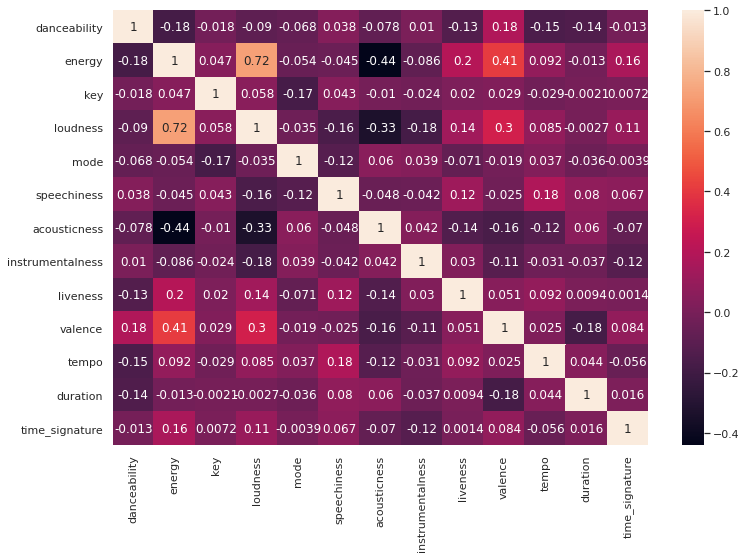

In [88]:
df_slice = df[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'time_signature']]

plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)
sns.heatmap(df_slice.corr(), annot=True)

It seems that there are not enough correlations between the features. This is good because we can see that these features are independent from each other and they can uniquely describe different songs.

In [75]:
df_slice['year'] = df['year']

In [74]:
df_slice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1456 non-null   float64
 1   energy            1456 non-null   float64
 2   key               1456 non-null   int64  
 3   loudness          1456 non-null   float64
 4   mode              1456 non-null   int64  
 5   speechiness       1456 non-null   float64
 6   acousticness      1456 non-null   float64
 7   instrumentalness  1456 non-null   float64
 8   liveness          1456 non-null   float64
 9   valence           1456 non-null   float64
 10  tempo             1456 non-null   float64
 11  duration          1456 non-null   float64
 12  time_signature    1456 non-null   int64  
 13  year              1456 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 159.4+ KB


### 4.2 Identifying trends of features from 2010 - 2019

There is nothing worse than being stuck in the past. Musicians too need to innovate. Metal rock and synth heavy disco music are not as popular as now than they were 20 years ago. If you were a composer who stick to this type of genre, there is a big possibility that you will not make it big. It is important to innovate and one way to determine what the 'hip new thing' is is to see the trend of musicality over the years.

We will now start to determine if there are trends between the features from 2010 - 2019.

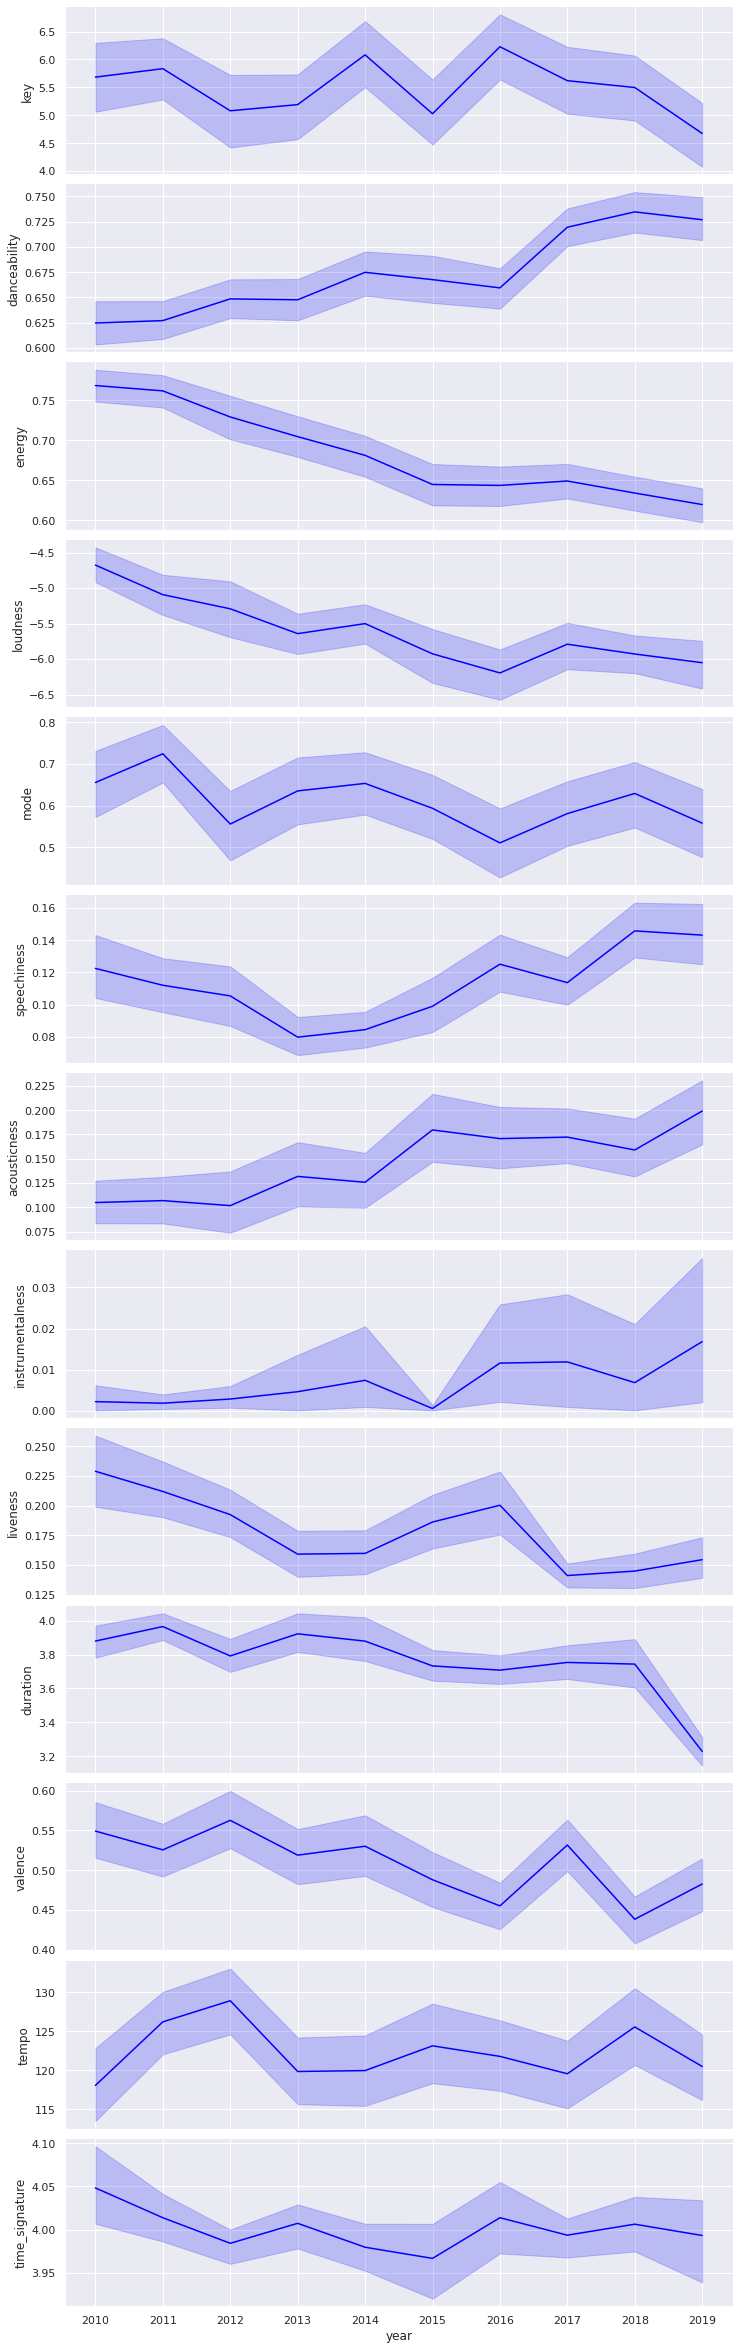

In [76]:
g = sns.PairGrid(df_slice, y_vars = ['key', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration', 
       'valence', 'tempo', 'time_signature'], x_vars=['year'], aspect=4)
g = g.map(sns.lineplot, color="blue")

The graphs show different trends for each feature from 2010 - 2019. Initially, we can see that there is a decline in energy, loudness, and duration while there is an increase in danceability and acousticness. Artists like 'Ed Sheeran' who is known for making acoustic songs in recent years and "LMFAO" or "DNCE" who make groovy dance songs are more popular now than before, so this graph makes sense to us. 

Let's now look at the distribution of these features among all the chart toppers.

### 4.3 Investigative: Was Billboard biased to one genre or are they fair in choosing chart toppers?

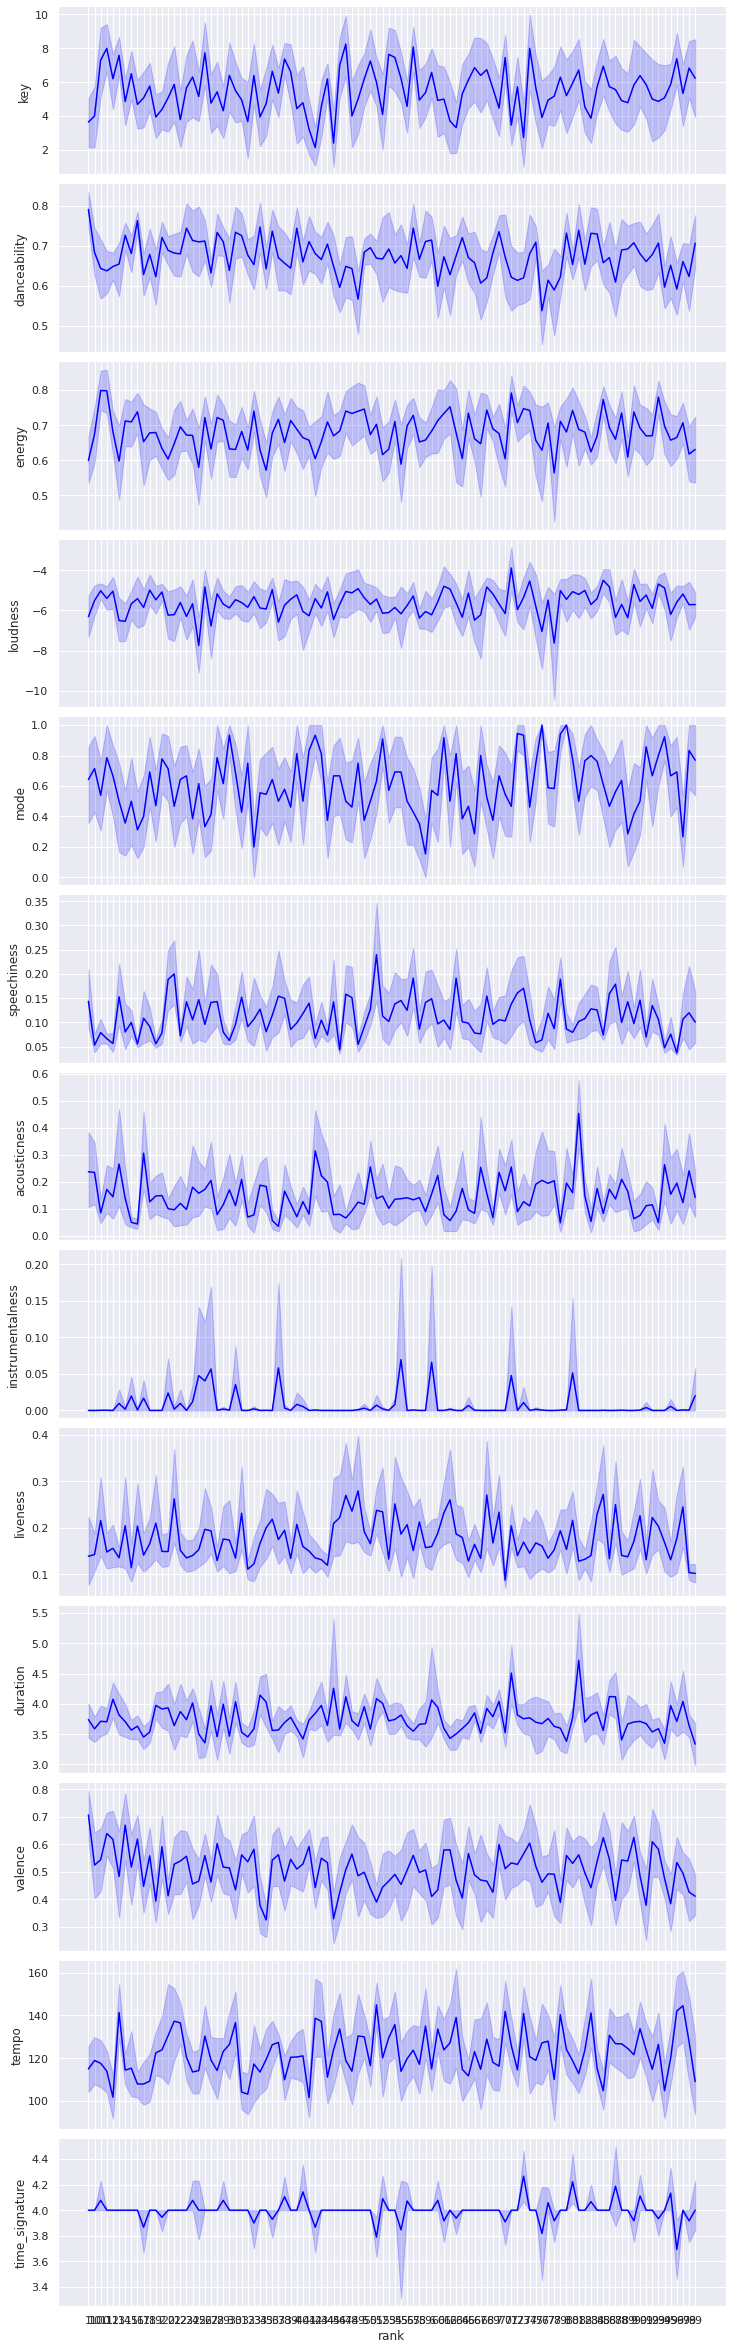

In [106]:
g = sns.PairGrid(df, y_vars = ['key', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration', 
       'valence', 'tempo', 'time_signature'], x_vars=['rank'], aspect=4)
g = g.map(sns.lineplot, color="blue")

These are simply distributions to compare the chart toppers from each other. Surprisingly, it is quite well distributed, suggesting that Billboard really chooses a diverse portfolio of songs for their yearly end charts, not just leaning towards a specific genre. With this we are assured that Billboard is fair when choosing chart toppers.

Next we will try to see the relationships between the features.

### 4.4 How are the features related to each other?

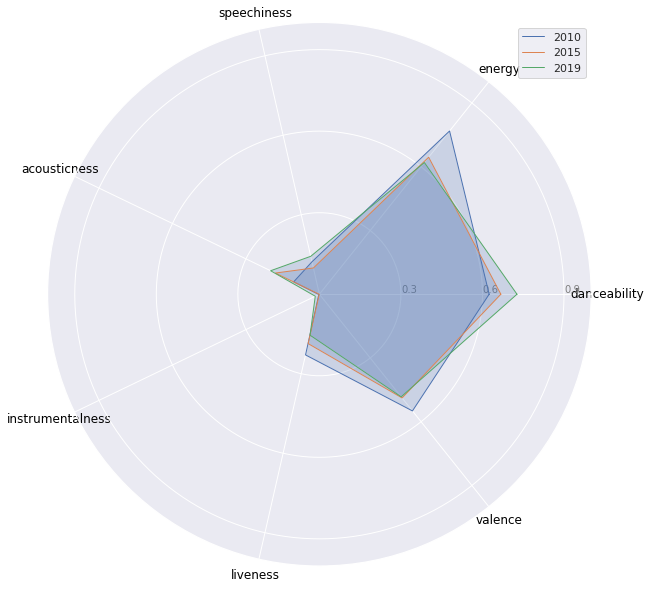

In [136]:
years = df['year'].unique()

web2019 = stats.loc[stats['year'] == 2019][['danceability', 'energy',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

web2015 = stats.loc[stats['year'] == 2015][['danceability', 'energy',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

web2010 = stats.loc[stats['year'] == 2010][['danceability', 'energy',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

# Set data
# number of variable
categories= ['danceability', 'energy', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence']
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

values = list(web2010.values.flatten())
values += values[:1]

values2 = list(web2019.values.flatten())
values2 += values2[:1]

values3 = list(web2015.values.flatten())
values3 += values3[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles_pass = angles[:-1]
 
# Initialise the spider plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles_pass, categories, color='black', size=12)
 
# Draw ylabels
ax.set_rlabel_position(0)

plt.yticks([0.3, 0.6, 0.9], ["0.3", "0.6", "0.9"], color="grey", size=10)
plt.ylim(0, 1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2010")
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.2)

# Plot data
ax.plot(angles, values3, linewidth=1, linestyle='solid', label = "2015")
 
# Fill area
ax.fill(angles, values3, 'b', alpha=0.2)

# Plot data
ax.plot(angles, values2, linewidth=1, linestyle='solid', label = '2019')
 
# Fill area
ax.fill(angles, values2, 'b', alpha=0.2)

ax.legend()
plt.show()

There is a drop in energy and increase in danceability from 2010 to 2019. Somehow you can also see that there are little to no songs that are both high in energy and danceable at the same time, or high in energy and high in acousticness also.

These relationships and trend changes throughout the years has become evident as there are more 'club dance' songs more than heavy rock songs. There is an evident increase in acousticness as well, suggesting that more people are now preferring chill and stripped down music than before. As a composer, this might be of big help. Maybe you would to create a song that's fit for a 'hangout night' than a 'rock concert on a weekend' type of vibe.

### 4.5 Songs are becoming 'less loud'

In [55]:
billyear = billboard.groupby('year').mean().reset_index()
billyear['year'] = billyear['year'].apply(int)

Text(0, 0.5, 'Loudness dB')

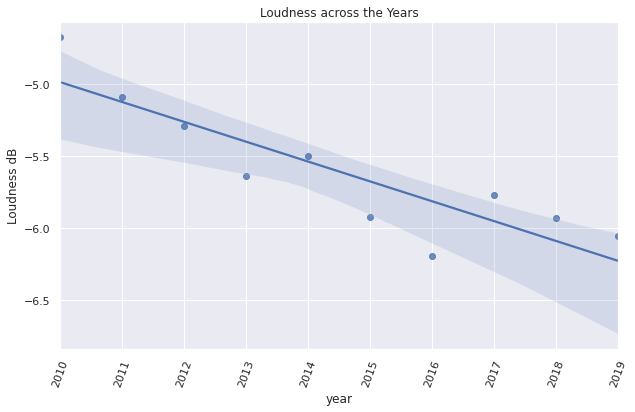

In [57]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="year", y="loudness", data=billyear)

plt.xticks(rotation=70)
plt.title('Loudness across the Years')
plt.ylabel('Loudness dB')

As shown in this graph, there is indeed a decrease of loudness in songs. It doesn't necessarily mean that songs are becoming quieter. It could mean that songs are becoming less loud ("rock" type music) and moving to pop and rnb type of music; not necessarily loud but groovy and needs less energy to groove to.

Speaking of energy, let's see if that changed over the years and test it with another feature. For this one, we will be testing energy and acousticness.

### 4.6 Energetic songs are becoming less popular; Acoustic songs are more on the rise.

Text(0, 0.5, 'Metric')

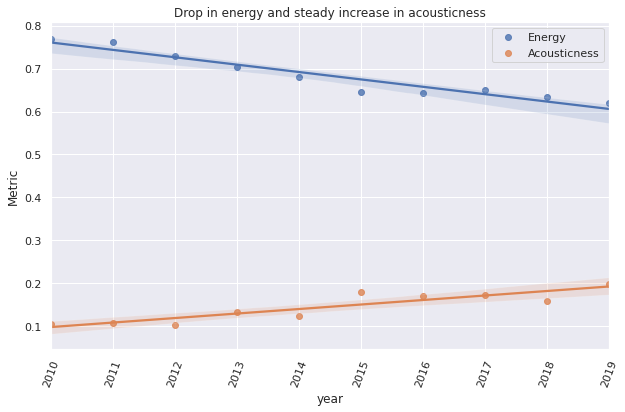

In [59]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="year", y="energy", data=billyear, label="Energy")
sns.regplot(x="year", y="acousticness", data=billyear, label="Acousticness")
plt.legend()
plt.xticks(rotation=70)
plt.title('Drop in energy and steady increase in acousticness')
plt.ylabel('Metric')

It seems that gentler music is becoming more popular. What does this mean for us? Are people becoming more tired? Kidding aside this could be attributed to the fact that on a macroperspective, since there are lots of things happening in the world, people prefer to slow down a bit, thus the rise of more acoustic songs.

### 4.7 People preferring to groove, than to rock out

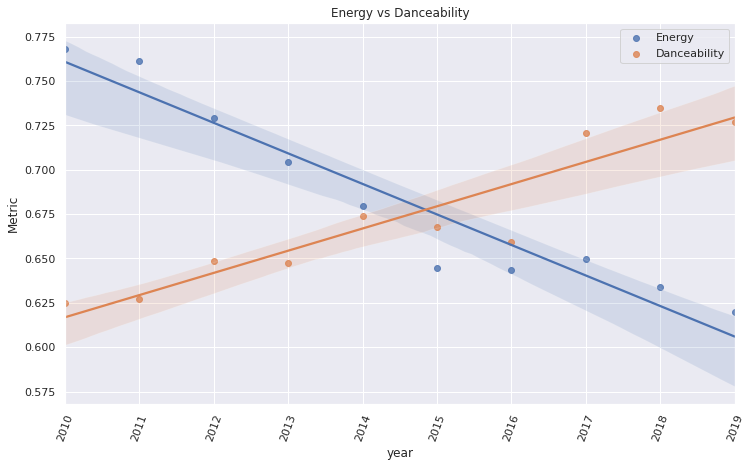

In [107]:
f, ax = plt.subplots(figsize=(12, 7))
sns.regplot(x="year", y="energy", data=billyear, label="Energy")
sns.regplot(x="year", y="danceability", data=billyear, label="Danceability")
plt.legend()
plt.xticks(rotation=70)
plt.title('Energy vs Danceability')
plt.ylabel('Metric')
plt.show()

This supports the idea that energetic songs are really decreasing, but it is quite an interesting find that Danceability increased. The increase here is almost as steep as the decline in energy. This suggests that people are preferring to dance more than to rock out. They prefer to bob their heads than to do some vicious headbanging. This could also be a clear evidence of the rise of several artists like 'Bruno Mars', 'Mark Ronson', 'Ariana Grande' among others who make groovy and funky songs. 

### 4.8 Which genre is on the rise?

After determining the salient features in all the chart-toppers, let's now see which genres are gaining more popularity.

We add the `genre` of each song to the existing dataframe by accessing it in the Spotify API.

In [111]:
from urllib.parse import urlencode

client_id = '725a3ec27d66438d83cec4d2ccd38d3a'
client_secret = 'f3554f3abb1c4307a838462da53b6fc5'
client_creds = f"{client_id}:{client_secret}"
client_creds_b64 = base64.b64encode(client_creds.encode())

token_url = 'https://accounts.spotify.com/api/token'
method = 'POST'
token_data = {'grant_type':'client_credentials'}
token_headers = {'Authorization':
                f'Basic {client_creds_b64.decode()}'}

r = requests.post(token_url, data = token_data, headers = token_headers)
print(r.json())
valid_request = r.status_code in range(200, 299)
token_response_data = r.json()


access_token = token_response_data['access_token']


{'access_token': 'BQC5vU0vJF1PjD46tJlRq0JPbpon7wpxZdNSgqw9vf1v3FWJj0AracRGPUEo0VykaMxyGFfMi5yhFECenVs', 'token_type': 'Bearer', 'expires_in': 3600, 'scope': ''}


In [135]:
artists = all_df['clean_artists']
headers = {"Authorization": f"Bearer {access_token}"}
endpoint = r"https://api.spotify.com/v1/search"
genre = []

for artist in artists:
    data = urlencode({'q': artist, 'type': 'artist', })
    lookup_url = f"{endpoint}?{data}"
    r = requests.get(lookup_url, headers = headers)
    res_json = r.json()
    
    if len(res_json['artists']['items'][0]['genres'])>0:
        genre.append(res_json['artists']['items'][0]['genres'][0])
    else:
        genre.append('')

In [137]:
genre

['dance pop',
 'contemporary country',
 'neo mellow',
 'dance pop',
 'g funk',
 'atl hip hop',
 'dance pop',
 'atl hip hop',
 'pop',
 'detroit hip hop',
 'barbadian pop',
 'dance pop',
 'dance pop',
 'dance pop',
 'atl hip hop',
 'atl hip hop',
 'dance pop',
 'dance pop',
 'dance pop',
 'dirty south rap',
 'dance pop',
 'dance pop',
 'barbadian pop',
 'dance pop',
 'dance pop',
 'dance pop',
 'dance pop',
 'dance pop',
 'filter house',
 'dance pop',
 'east coast hip hop',
 'hip pop',
 'atl hip hop',
 'dance pop',
 'dance pop',
 'dance pop',
 'detroit hip hop',
 'dance pop',
 'dance pop',
 'dance pop',
 'celtic rock',
 'dance pop',
 'dance pop',
 'modern rock',
 'dance pop',
 'dance pop',
 'canadian hip hop',
 'dance pop',
 'dance pop',
 'dance pop',
 'atl hip hop',
 'asian american hip hop',
 '',
 'contemporary country',
 'dance pop',
 'dance pop',
 'adult standards',
 'dance pop',
 'dance pop',
 'hip hop',
 'alternative dance',
 'dance pop',
 'canadian pop',
 'atl hip hop',
 'dance po

There are plenty of types of genres but fall under the same category. A bit of cleaning will help facilitate our analysis later.

In [140]:
for i in range(len(genre)):
    if 'pop' in genre[i]:
        genre[i] = 'pop'
    elif 'country' in genre[i]:
        genre[i] = 'country'
    elif 'rap' in genre[i]:
        genre[i] = 'rap'
    elif 'hip hop' in genre[i]:
        genre[i] = 'hip hop'

In [142]:
all_df['genre'] = genre

Let's see which genres are prominent in the chart toppers.

In [168]:
uniques, counts = np.unique(genre, return_counts = True)

genres_uniques = list(zip(uniques, counts))

(sorted(genres_uniques, key = lambda x: x[1], reverse = True))[:10]

[('pop', 705),
 ('hip hop', 270),
 ('country', 120),
 ('rap', 105),
 ('', 42),
 ('latin', 22),
 ('modern rock', 20),
 ('canadian contemporary r&b', 19),
 ('alternative r&b', 17),
 ('boy band', 13)]

### 4.8.1 What is the trend of the top genres?

In this part, we will look at the trend of the top genres from the data that we gathered. For this analysis, we will be using `pop`, `hip hop`, `rap`, and `country` because they are the top genres as show before.

In [145]:
pop_years = (all_df.loc[all_df['genre']== 'pop'].
             groupby('year').count()['genre'])
hip_hop_years = (all_df.loc[all_df['genre']== 'hip hop'].
                 groupby('year').count()['genre'])
rap_years = (all_df.loc[all_df['genre']== 'rap'].
             groupby('year').count()['genre'])
country_years (= all_df.loc[all_df['genre']== 'country']
               .groupby('year').count()['genre'])


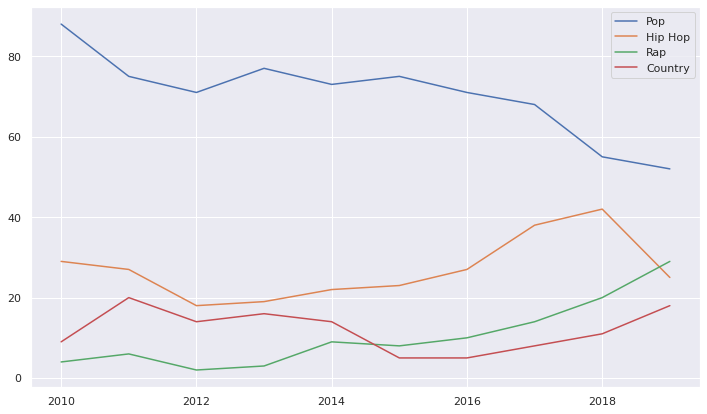

In [150]:
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
sns.lineplot(data = pop_years)
sns.lineplot(data = hip_hop_years)
sns.lineplot(data = rap_years)
sns.lineplot(data = country_years)
plt.legend(('Pop','Hip Hop','Rap', 'Country'))
plt.show()

It seems that `pop` and `hiphop` are on the decline but in terms of quantity, these genres are still king. Most songs are still on this genre so expect to be around for a long time. One thing to note is that `rap` and `country` are gaining more traction. The presence of `Taylor Swift` and rappers like `Drake`, `Eminem` in the top charts are evidence of this.

### 4.8.2 Tips for Composers of a Specific Genre

Since pop is a popular genre still, if you compose a pop song; how should you then structure your songs? The next few analysis shows the prominent features your pop songs should have.

In [158]:
pop2019 = (all_df.loc[(all_df['genre'] == 'pop') & 
                      (all_df['year']  == 2019)].groupby(['year']).mean())
hip_hop2019 = (all_df.loc[(all_df['genre'] == 'hip hop') & 
                          (all_df['year']  == 2019)].groupby(['year']).mean())

pop2019 = pop2019[['danceability', 'energy',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

hip_hop2019 = hip_hop2019[['danceability', 'energy',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

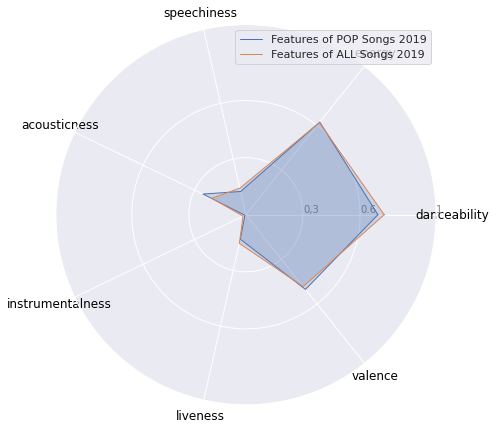

In [162]:
# Set data
 
# number of variable
categories= ['danceability', 'energy', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence']
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

values = list(pop2019.values.flatten())
values += values[:1]

#values2 = list(hip_hop2019.values.flatten())
#values2 += values2[:1]

values3 = list(web2019.values.flatten())
values3 += values3[:1]


# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles_pass = angles[:-1]
 
# Initialise the spider plot
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles_pass, categories, color='black', size=12)
 
# Draw ylabels
ax.set_rlabel_position(0)

plt.yticks([0.3, 0.6, 1], ["0,3", "0.6", "1"], color="grey", size=10)
plt.ylim(0, 1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid',
        label='Features of POP Songs 2019')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.2)

# Plot data
ax.plot(angles, values3, linewidth=1, linestyle='solid', 
        label = 'Features of ALL Songs 2019')
 
# Fill area
ax.fill(angles, values3, 'b', alpha=0.2)

ax.legend()
plt.show()

Pop songs follow the pattern of the salient features of the rest of 2019 chart toppers. This means that there is not much deviation from the current format of songs: highly danceable, not too loud, and with not much words. 

Let's now try Hip hop songs.

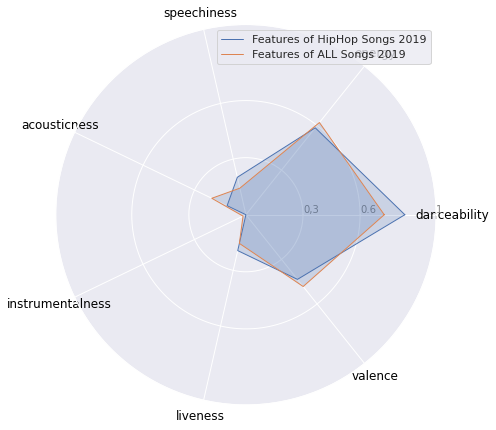

In [165]:
# Set data
 
# number of variable
categories= ['danceability', 'energy', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence']
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

#values = list(pop2019.values.flatten())
#values += values[:1]

values2 = list(hip_hop2019.values.flatten())
values2 += values2[:1]

values3 = list(web2019.values.flatten())
values3 += values3[:1]


# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles_pass = angles[:-1]
 
# Initialise the spider plot
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles_pass, categories, color='black', size=12)
 
# Draw ylabels
ax.set_rlabel_position(0)

plt.yticks([0.3, 0.6, 1], ["0,3", "0.6", "1"], color="grey", size=10)
plt.ylim(0, 1)
 
# Plot data
#ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
#ax.fill(angles, values, 'b', alpha=0.2)

# Plot data
ax.plot(angles, values2, linewidth=1, linestyle='solid', 
        label = 'Features of HipHop Songs 2019')
 
# Fill area
ax.fill(angles, values2, 'b', alpha=0.2)

# Plot data
ax.plot(angles, values3, linewidth=1, linestyle='solid',
       label = 'Features of ALL Songs 2019')
 
# Fill area
ax.fill(angles, values3, 'b', alpha=0.2)

ax.legend()
plt.show()

For hip hop genre, composing songs with danceable beats along with some energetic accents, less instrumentations and less words turns out to be a good format to do.  

## 5. Insights

From the analysis, we offer some insights to budding composers: 

1. People are preferring quieter songs over loud music. 
2. Danceable songs are getting quite popular. 
3. Low energy songs are better hitmakers than loud ones.
4. Pop and Hiphop are still the top genres.
5. Rap and country are gaining traction.

## 6. Conclusion and Recommendations

The Wikipedia, Billboard, and Spotify data gave us an idea of how songs have changed over the decade. Songs are clear indicators of how people view the present time and the trends shown in the data gathered are a reflection of the types of music that people are liking. As a composer, if one wants to be chart-topper, one must take note of the trends and see if they can make songs based on the trends shown above. __Songs are becoming less loud, more danceable, and less energetic.__ 

As a recommendation, we suggest the following for the composers if they are hesitant to start making music:

1. Consider making a song for a top genre. Though for uniqueness, also consider making a song for a genre with few songs but the trend of it is promising; for example, country genre.
2. Try to ride the trend first. Make lo-fi chill songs perfect for a date night. Make danceable songs apt for a millenial crowd on a friday night. Make an acoustic song well suited for a gig under the stars.
3. If unsure make plenty of songs that favor each feature. For example, make an acoustic song, a highly dancaeable song, a happy song, a loud song, and see what works for you. In that way, whatever the trend will be in the future, you are sure to have plenty of types of songs in your portfolio.  
4. Above all else, follow your heart and passion. Make sure to make songs not just to be famous, but compose and produce songs because they make you happy. Pour your heart into your songs. Even if only 1 will listen to it, the best way to start is to just throw it out there.

## 7. References
Wikipedia. “Billboard Hot 100”. Accessed June 5, 2020. https://en.wikipedia.org/wiki/Billboard_Hot_100
